In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import soepy

# import get_moments

Analysis 30,000 obs
---------------------------

Parameters
--------------

In [24]:
# Note: fval at evaluation 764: 0.4233

params_vec_final_seed_30000 = [
    1.92653,
    1.99033,
    1.97371,
    0.12184,
    0.15709,
    0.27248,
    0.19276,
    0.17097,
    0.1275,
    0.07789,
    0.05422,
    0.07057,
    1.90072,
    2.44201,
    -0.19337,
    -0.49972,
    -0.10013,
    -0.30067,
    0.20123,
    0.30097,
    0.01001,
    0.19132,
    0.46936,
]

In [25]:
# Note fval at evaluation 999 = 2.31187

params_vec_final_delta0_30000 = [
    1.96669,
    1.99444,
    1.96564,
    0.12935,
    0.1534,
    0.27654,
    0.18697,
    0.09953,
    0.1336,
    0.08138,
    0.05418,
    0.07012,
    1.89964,
    2.43725,
    -0.19796,
    -0.49496,
    -0.09977,
    -0.30698,
    0.19579,
    0.29856,
    0.00946,
    0.04842,
    0.47511,
]

In [39]:
model_params_true = pd.read_pickle("init_files/toy_model_init_file_03_3types.pkl")

In [26]:
model_params_true["value"] - params_vec_final_seed_30000

category       name     
const_wage_eq  gamma_0s1    0.02595
               gamma_0s2    0.02451
               gamma_0s3    0.00422
exp_returns    gamma_1s1    0.00194
               gamma_1s2    0.00096
               gamma_1s3    0.00132
exp_accm       g_s1        -0.01015
               g_s2        -0.08589
               g_s3         0.00067
exp_deprec     delta_s1    -0.00024
               delta_s2    -0.00033
               delta_s3    -0.00071
disutil_work   const_p     -0.02409
               const_f     -0.02071
hetrg_unobs    theta_p1    -0.00664
               theta_f1    -0.01253
               theta_p2     0.00563
               theta_f2     0.00097
shares         share_1     -0.00925
               share_2      0.00469
sd_wage_shock  sigma_1      0.00002
               sigma_2     -0.11177
               sigma_3      0.00086
Name: value, dtype: float64

In [27]:
model_params_true["value"] - params_vec_final_delta0_30000

category       name     
const_wage_eq  gamma_0s1   -0.01421
               gamma_0s2    0.02040
               gamma_0s3    0.01229
exp_returns    gamma_1s1   -0.00557
               gamma_1s2    0.00465
               gamma_1s3   -0.00274
exp_accm       g_s1        -0.00436
               g_s2        -0.01445
               g_s3        -0.00543
exp_deprec     delta_s1    -0.00373
               delta_s2    -0.00029
               delta_s3    -0.00026
disutil_work   const_p     -0.02301
               const_f     -0.01595
hetrg_unobs    theta_p1    -0.00205
               theta_f1    -0.01729
               theta_p2     0.00527
               theta_f2     0.00728
shares         share_1     -0.00381
               share_2      0.00710
sd_wage_shock  sigma_1      0.00057
               sigma_2      0.03113
               sigma_3     -0.00489
Name: value, dtype: float64

In [28]:
model_params_seed = model_params_true
model_params_seed["value"] = params_vec_final_seed_30000

In [29]:
model_params_delta0 = model_params_true
model_params_delta0["value"] = params_vec_final_delta0_30000

In [30]:
data_obs = pd.read_pickle("init_files/data_obs_3types_9000.pkl")

In [31]:
data_sim_seed = soepy.simulate(model_params_seed, "init_files/model_spec_init_test_seed_30000.yml")

In [32]:
data_sim_delta0 = soepy.simulate(model_params_delta0, "init_files/model_spec_init_test_delta0_30000.yml")

Get moments

In [33]:
def get_moments(data):
    # Pre_process data frame

    # Determine the education level given years of experience
    data["Educ_Level"] = 0
    data.loc[data["Years_of_Education"] == 11, "Educ_Level"] = 1
    data.loc[data["Years_of_Education"] == 12, "Educ_Level"] = 2

    # Determine the observed wage given period choice
    data["Wage_Observed"] = 0
    data.loc[data["Choice"] == 0, "Wage_Observed"] = data.loc[
        data["Choice"] == 0, "Period_Wage_N"
    ]
    data.loc[data["Choice"] == 1, "Wage_Observed"] = data.loc[
        data["Choice"] == 1, "Period_Wage_P"
    ]
    data.loc[data["Choice"] == 2, "Wage_Observed"] = data.loc[
        data["Choice"] == 2, "Period_Wage_F"
    ]

    # Calculate moments

    # Initialize moments dictionary
    moments = dict()

    # Store moments in groups as nested dictionary
    for group in ["Wage_Distribution", "Choice_Probability"]:
        moments[group] = dict()

    # Compute unconditional moments of the wage distribution
    info = data.groupby(["Period"])["Wage_Observed"].describe().to_dict()

    # Save mean and standard deviation of wages for each period
    # to Wage Distribution section of the moments dictionary
    for period in range(30):  ## TO DO: Remove hard coded number
        moments["Wage_Distribution"][period] = []
        try:
            for label in ["mean", "std"]:
                moments["Wage_Distribution"][period].append(info[label][period])
        except KeyError:
            for i in range(2):
                moments["Wage_Distribution"][period].append(0.0)

    # Compute unconditional moments of the choice probabilities
    info = data.groupby(["Period"])["Choice"].value_counts(normalize=True).to_dict()

    for period in range(30):  ## TO DO: Remove hard coded number
        moments["Choice_Probability"][period] = []
        for choice in range(3):
            try:
                stat = info[(period, choice)]
            except KeyError:
                stat = 0.00
            moments["Choice_Probability"][period].append(stat)

    return moments

In [34]:
obs_moments = get_moments(data_obs)
seed_sim_moments = get_moments(data_sim_seed)
delta0_sim_moments = get_moments(data_sim_delta0)

Comparison: Observed vs. seed test final values
---------------------------------------------------------

Choice Probabilities

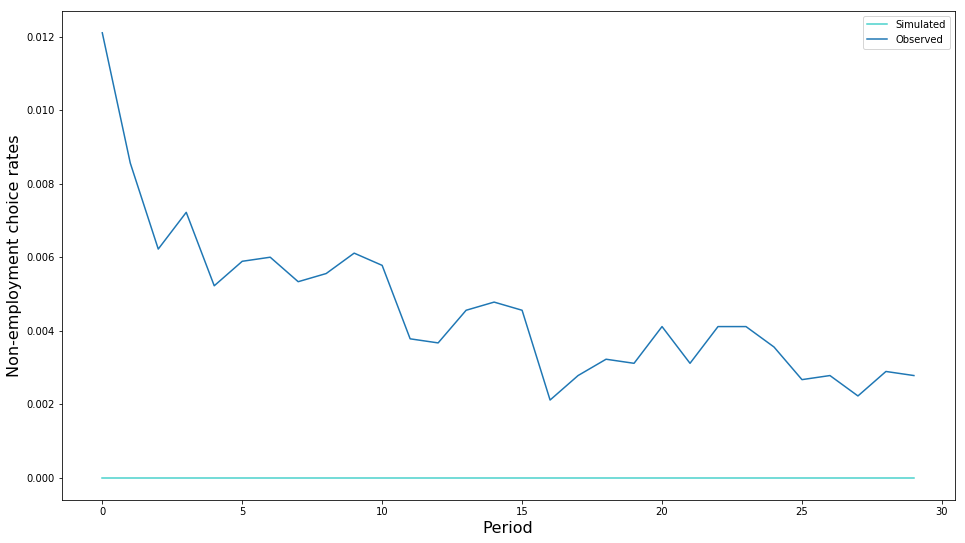

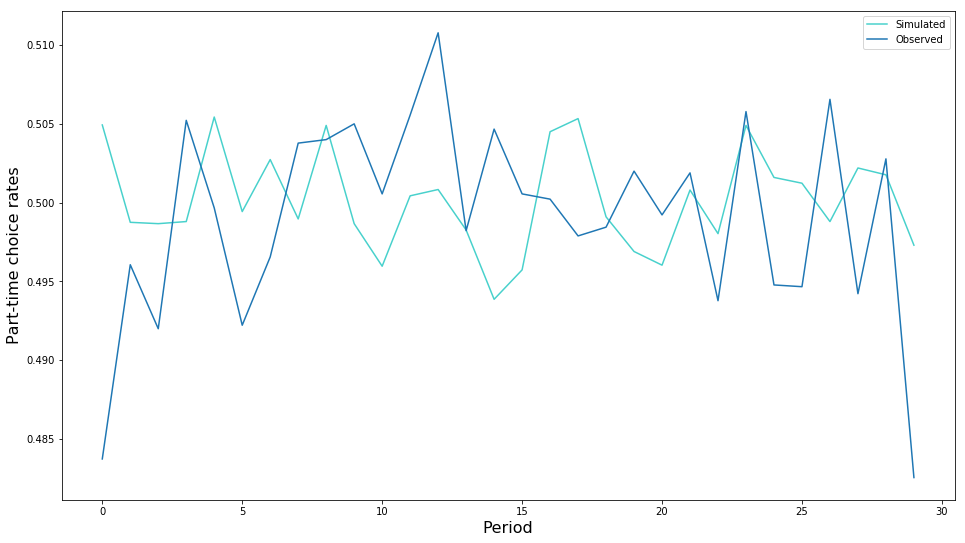

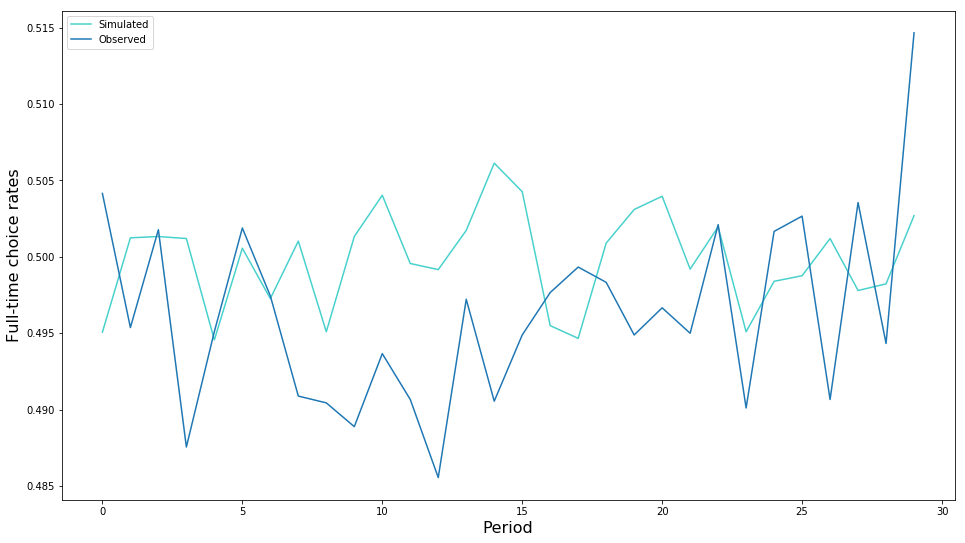

In [35]:
lables = ["Non-employment choice rates", "Part-time choice rates", "Full-time choice rates"]
for choice in range(3):

    obs_choice_prob = []
    for _, value in obs_moments["Choice_Probability"].items():
        temp = [_, value]
        obs_choice_prob.append(temp[1][choice])

    sim_choice_prob = []
    for _, value in seed_sim_moments["Choice_Probability"].items():
        temp = [_, value]
        sim_choice_prob.append(temp[1][choice])
        
    x = np.arange(30)

    # Start plot
    ax = plt.figure(figsize=[16,9]).add_subplot(111)
    ax.set_ylabel(lables[choice], fontsize=16)
    ax.set_xlabel("Period", fontsize=16)

    plt.plot(x, sim_choice_prob, color = 'mediumturquoise')
    plt.plot(x, obs_choice_prob)

    ax.legend(["Simulated", "Observed"])

    #plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Wages

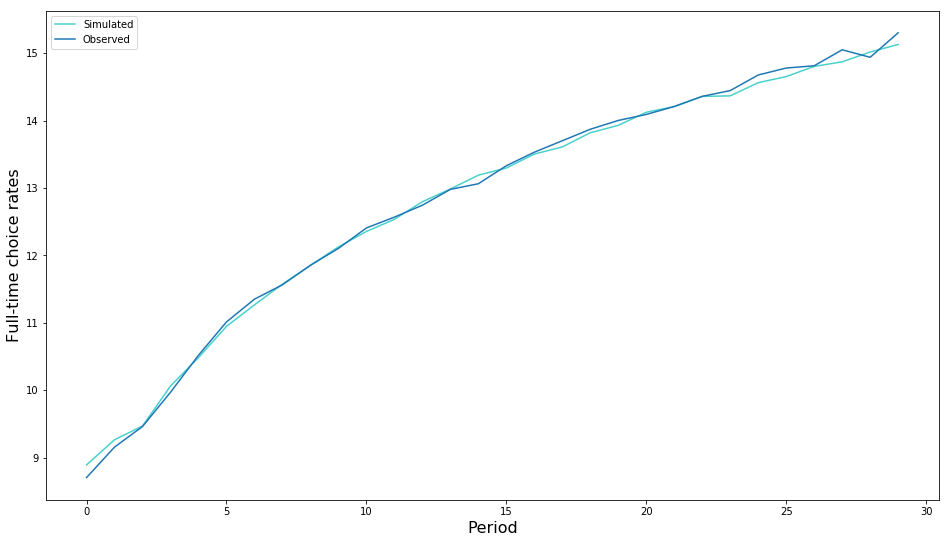

In [36]:
obs_wages = []
for _, value in obs_moments["Wage_Distribution"].items():
    temp = [_, value]
    obs_wages.append(temp[1][0])

sim_wages = []
for _, value in seed_sim_moments["Wage_Distribution"].items():
    temp = [_, value]
    sim_wages.append(temp[1][0])

x = np.arange(30)

# Start plot
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel(lables[choice], fontsize=16)
ax.set_xlabel("Period", fontsize=16)

plt.plot(x, sim_wages, color = 'mediumturquoise')
plt.plot(x, obs_wages)

ax.legend(["Simulated", "Observed"])

#plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Comparison: Observed vs. delta0 test final values
---------------------------------------------------------

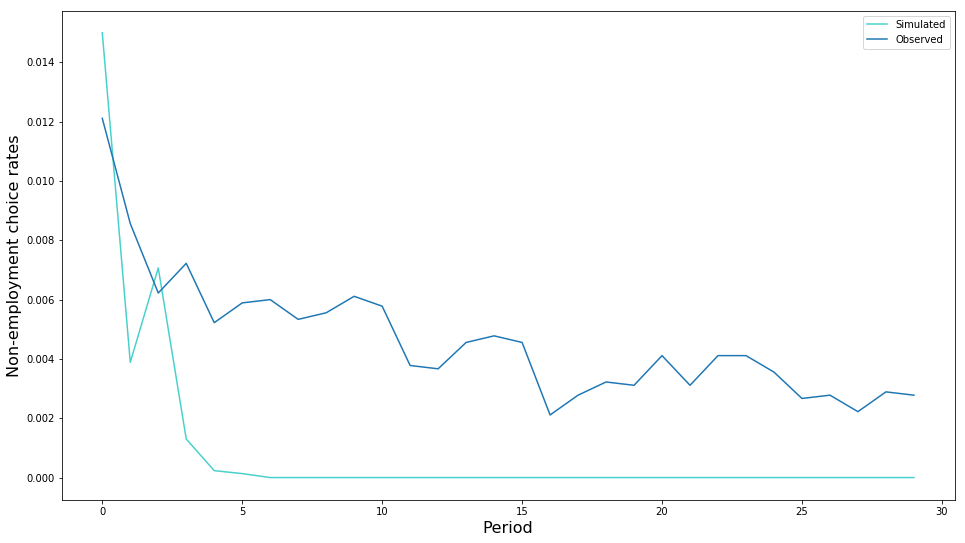

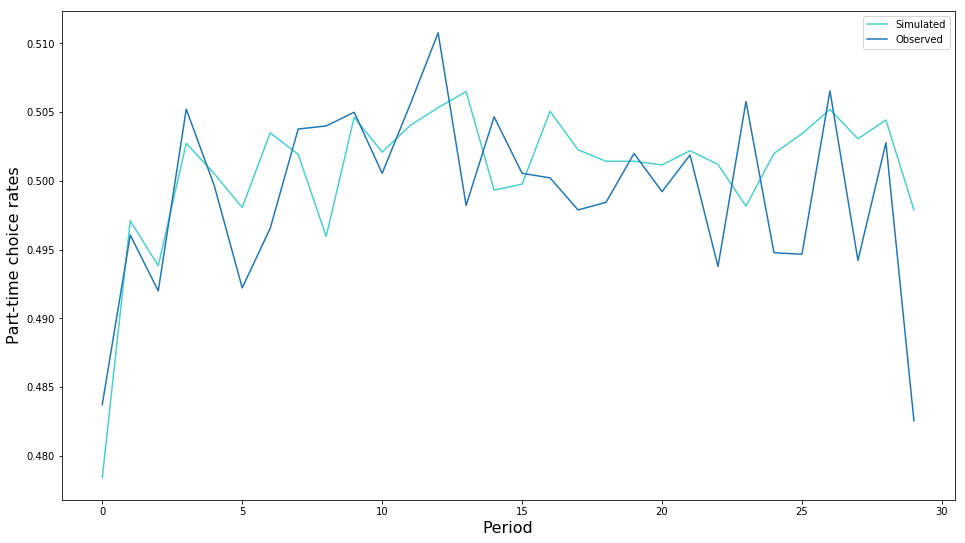

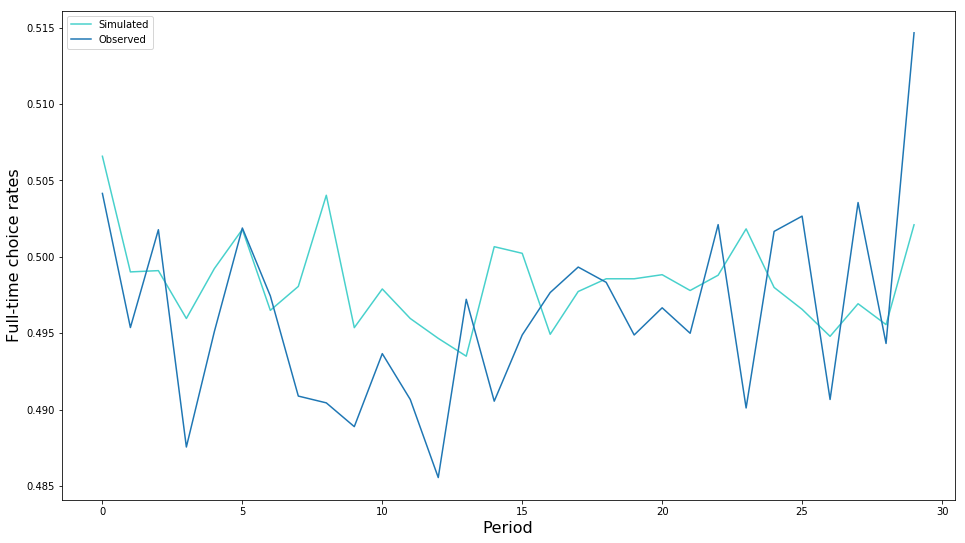

In [37]:
for choice in range(3):

    obs_choice_prob = []
    for _, value in obs_moments["Choice_Probability"].items():
        temp = [_, value]
        obs_choice_prob.append(temp[1][choice])

    sim_choice_prob = []
    for _, value in delta0_sim_moments["Choice_Probability"].items():
        temp = [_, value]
        sim_choice_prob.append(temp[1][choice])
        
    x = np.arange(30)

    # Start plot
    ax = plt.figure(figsize=[16,9]).add_subplot(111)
    ax.set_ylabel(lables[choice], fontsize=16)
    ax.set_xlabel("Period", fontsize=16)

    plt.plot(x, sim_choice_prob, color = 'mediumturquoise')
    plt.plot(x, obs_choice_prob)

    ax.legend(["Simulated", "Observed"])

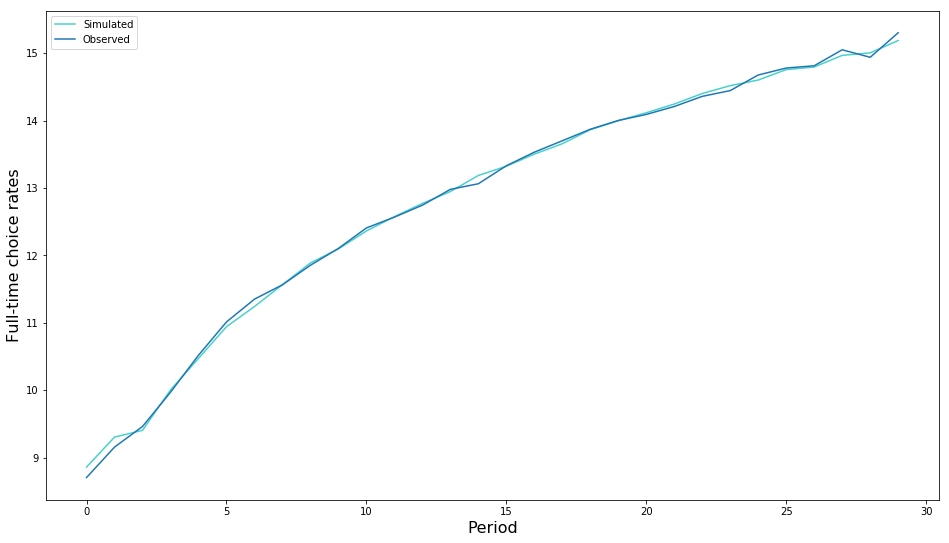

In [38]:
obs_wages = []
for _, value in obs_moments["Wage_Distribution"].items():
    temp = [_, value]
    obs_wages.append(temp[1][0])

sim_wages = []
for _, value in delta0_sim_moments["Wage_Distribution"].items():
    temp = [_, value]
    sim_wages.append(temp[1][0])

x = np.arange(30)

# Start plot
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel(lables[choice], fontsize=16)
ax.set_xlabel("Period", fontsize=16)

plt.plot(x, sim_wages, color = 'mediumturquoise')
plt.plot(x, obs_wages)

ax.legend(["Simulated", "Observed"])

#plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Analysis 1,000 Obs
-----------------------

Parameter vectors
----------------------

In [2]:
## Note fval at evaluation 999 = 4.39705

params_vec_final_seed = [
    1.92349,
    1.98973,
    1.97784,
    0.12899,
    0.1511,
    0.27304,
    0.31866,
    0.0942,
    0.12861,
    0.07585,
    0.05413,
    0.06987,
    1.89953,
    2.43803,
    -0.20104,
    -0.48932,
    -0.10004,
    -0.30027,
    0.19991,
    0.29836,
    0.01003,
    0.19165,
    0.46997,
]

In [3]:
## Note fval at evaluation 999 = 1.94921

params_vec_final_delta0 = [
    1.95248,
    2.01484,
    1.97793,
    0.12378,
    0.15805,
    0.2738,
    0.18261,
    0.08508,
    0.12817,
    0.07765,
    0.05389,
    0.06986,
    1.87663,
    2.4213,
    -0.20001,
    -0.51225,
    -0.0945,
    -0.2997,
    0.19198,
    0.30566,
    0.01003,
    0.07955,
    0.47022,
]

In [5]:
model_params_true["value"] - params_vec_final_seed

category       name     
const_wage_eq  gamma_0s1    0.00151
               gamma_0s2    0.00127
               gamma_0s3   -0.00384
exp_returns    gamma_1s1   -0.00699
               gamma_1s2    0.00590
               gamma_1s3   -0.00004
exp_accm       g_s1        -0.13766
               g_s2        -0.00020
               g_s3        -0.00061
exp_deprec     delta_s1     0.00215
               delta_s2    -0.00013
               delta_s3     0.00013
disutil_work   const_p      0.00047
               const_f      0.00297
hetrg_unobs    theta_p1     0.00104
               theta_f1    -0.01068
               theta_p2     0.00004
               theta_f2     0.00027
shares         share_1      0.00009
               share_2      0.00164
sd_wage_shock  sigma_1     -0.00003
               sigma_2      0.00035
               sigma_3      0.00003
Name: value, dtype: float64

Parameters that are most far off the true parameter vector here are g_s1 and theta_f1

In [6]:
model_params_true["value"] - params_vec_final_delta0

category       name     
const_wage_eq  gamma_0s1   -0.02748
               gamma_0s2   -0.02384
               gamma_0s3   -0.00393
exp_returns    gamma_1s1   -0.00178
               gamma_1s2   -0.00105
               gamma_1s3   -0.00080
exp_accm       g_s1        -0.00161
               g_s2         0.00892
               g_s3        -0.00017
exp_deprec     delta_s1     0.00035
               delta_s2     0.00011
               delta_s3     0.00014
disutil_work   const_p      0.02337
               const_f      0.01970
hetrg_unobs    theta_p1     0.00001
               theta_f1     0.01225
               theta_p2    -0.00550
               theta_f2    -0.00030
shares         share_1      0.00802
               share_2     -0.00566
sd_wage_shock  sigma_1     -0.00003
               sigma_2      0.11245
               sigma_3     -0.00022
Name: value, dtype: float64

Parameters here are overall further away from the true ones. However, this optimisation only ran for 500 evaluations. Big differences in sigma_2, constants of the wage equations and returns to experience.

Get moments
----------------

In [7]:
model_params_seed = model_params_true
model_params_seed["value"] = params_vec_final_seed

In [8]:
model_params_delta0 = model_params_true
model_params_delta0["value"] = params_vec_final_delta0

In [9]:
data_obs = pd.read_pickle("init_files/Archive/data_obs_3types.pkl")

In [10]:
data_sim_seed = soepy.simulate(model_params_seed, "init_files/Archive/model_spec_init_test_seed.yml")

In [12]:
data_sim_delta0 = soepy.simulate(model_params_delta0, "init_files/Archive/model_spec_init_test_delta0.yml")

In [13]:
def get_moments(data):
    # Pre_process data frame

    # Determine the education level given years of experience
    data["Educ_Level"] = 0
    data.loc[data["Years_of_Education"] == 11, "Educ_Level"] = 1
    data.loc[data["Years_of_Education"] == 12, "Educ_Level"] = 2

    # Determine the observed wage given period choice
    data["Wage_Observed"] = 0
    data.loc[data["Choice"] == 0, "Wage_Observed"] = data.loc[
        data["Choice"] == 0, "Period_Wage_N"
    ]
    data.loc[data["Choice"] == 1, "Wage_Observed"] = data.loc[
        data["Choice"] == 1, "Period_Wage_P"
    ]
    data.loc[data["Choice"] == 2, "Wage_Observed"] = data.loc[
        data["Choice"] == 2, "Period_Wage_F"
    ]

    # Calculate moments

    # Initialize moments dictionary
    moments = dict()

    # Store moments in groups as nested dictionary
    for group in ["Wage_Distribution", "Choice_Probability"]:
        moments[group] = dict()

    # Compute unconditional moments of the wage distribution
    info = data.groupby(["Period"])["Wage_Observed"].describe().to_dict()

    # Save mean and standard deviation of wages for each period
    # to Wage Distribution section of the moments dictionary
    for period in range(40):  ## TO DO: Remove hard coded number
        moments["Wage_Distribution"][period] = []
        try:
            for label in ["mean", "std"]:
                moments["Wage_Distribution"][period].append(info[label][period])
        except KeyError:
            for i in range(2):
                moments["Wage_Distribution"][period].append(0.0)

    # Compute unconditional moments of the choice probabilities
    info = data.groupby(["Period"])["Choice"].value_counts(normalize=True).to_dict()

    for period in range(40):  ## TO DO: Remove hard coded number
        moments["Choice_Probability"][period] = []
        for choice in range(3):
            try:
                stat = info[(period, choice)]
            except KeyError:
                stat = 0.00
            moments["Choice_Probability"][period].append(stat)

    return moments

In [14]:
obs_moments = get_moments(data_obs)
seed_sim_moments = get_moments(data_sim_seed)
delta0_sim_moments = get_moments(data_sim_delta0)

Comparison: Observed vs. seed test final values
---------------------------------------------------------

Choice Probability

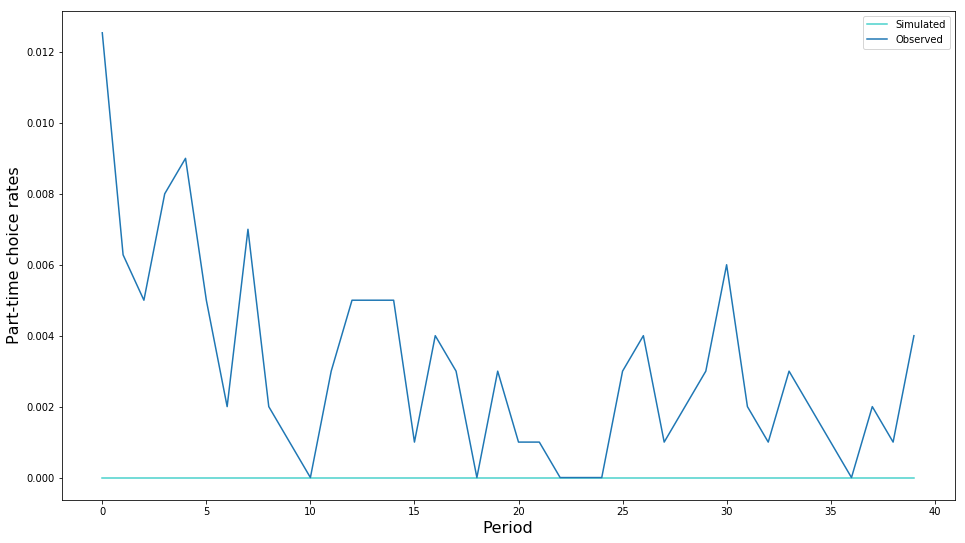

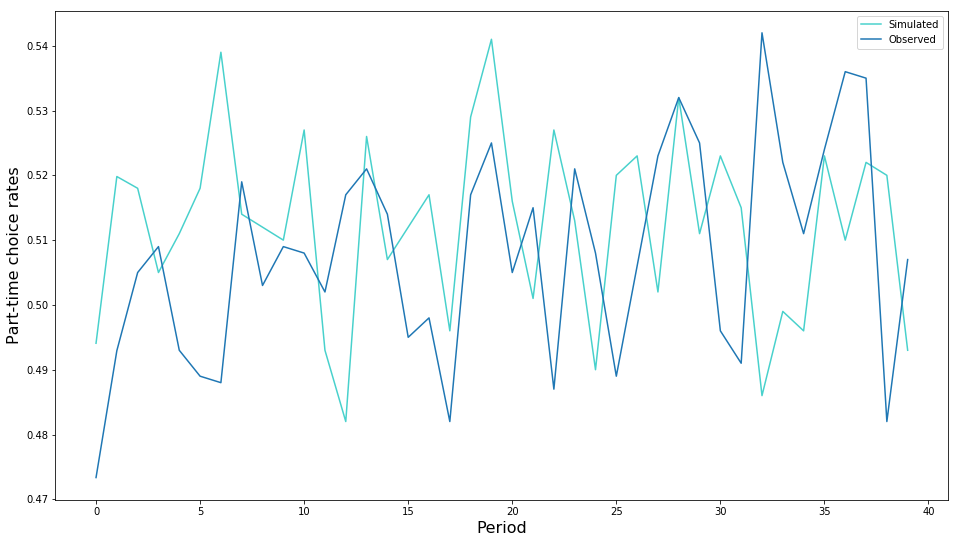

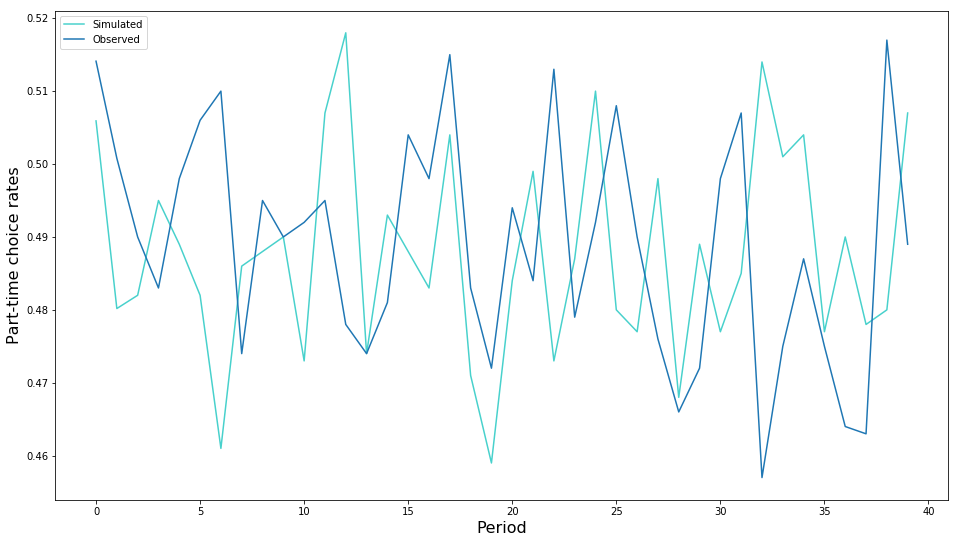

In [15]:
for choice in range(3):

    obs_choice_prob = []
    for _, value in obs_moments["Choice_Probability"].items():
        temp = [_, value]
        obs_choice_prob.append(temp[1][choice])

    sim_choice_prob = []
    for _, value in seed_sim_moments["Choice_Probability"].items():
        temp = [_, value]
        sim_choice_prob.append(temp[1][choice])
        
    x = np.arange(40)

    # Start plot
    ax = plt.figure(figsize=[16,9]).add_subplot(111)
    ax.set_ylabel("Part-time choice rates", fontsize=16)
    ax.set_xlabel("Period", fontsize=16)

    plt.plot(x, sim_choice_prob, color = 'mediumturquoise')
    plt.plot(x, obs_choice_prob)

    ax.legend(["Simulated", "Observed"])

    #plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Wages

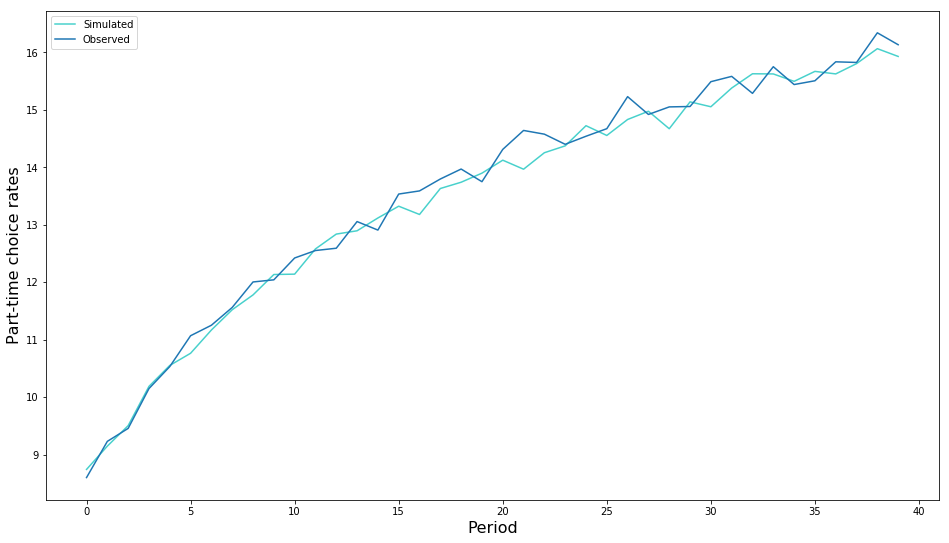

In [16]:
obs_wages = []
for _, value in obs_moments["Wage_Distribution"].items():
    temp = [_, value]
    obs_wages.append(temp[1][0])

sim_wages = []
for _, value in seed_sim_moments["Wage_Distribution"].items():
    temp = [_, value]
    sim_wages.append(temp[1][0])

x = np.arange(40)

# Start plot
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel("Part-time choice rates", fontsize=16)
ax.set_xlabel("Period", fontsize=16)

plt.plot(x, sim_wages, color = 'mediumturquoise')
plt.plot(x, obs_wages)

ax.legend(["Simulated", "Observed"])

#plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Comparison observed vs final delta0 values

Choice Probabilities

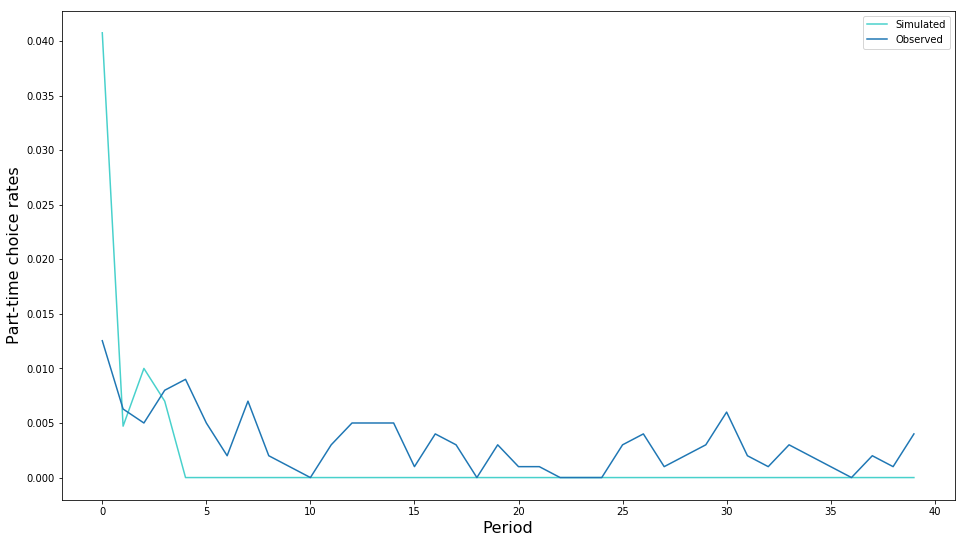

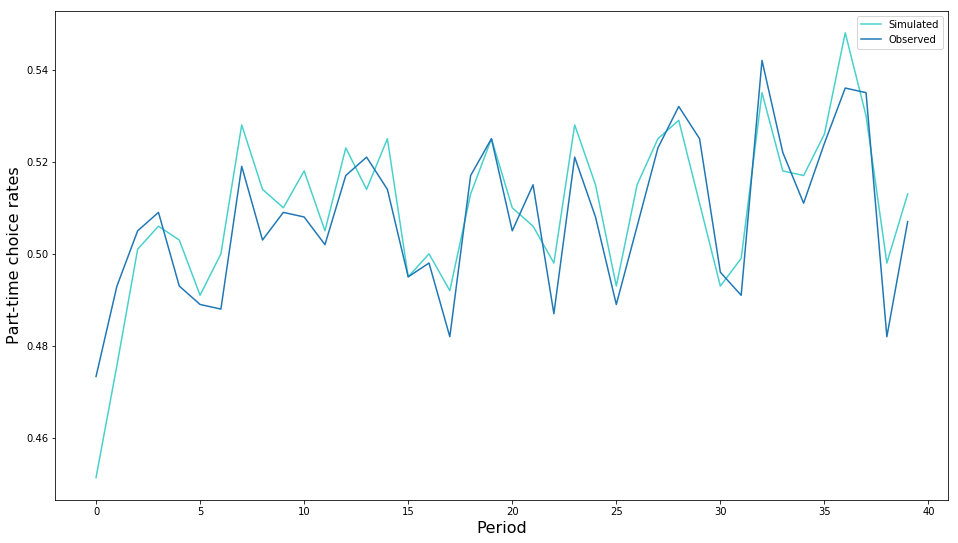

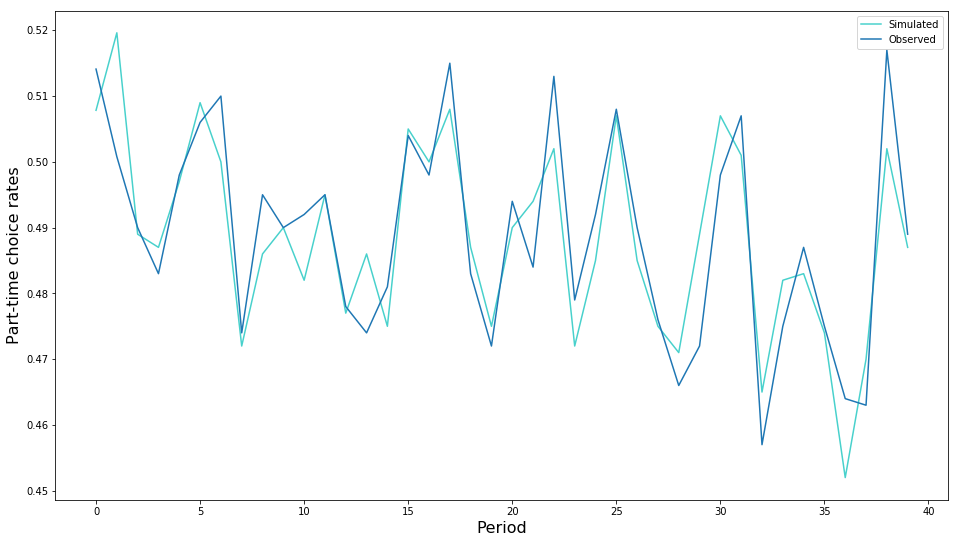

In [17]:
for choice in range(3):

    obs_choice_prob = []
    for _, value in obs_moments["Choice_Probability"].items():
        temp = [_, value]
        obs_choice_prob.append(temp[1][choice])

    sim_choice_prob = []
    for _, value in delta0_sim_moments["Choice_Probability"].items():
        temp = [_, value]
        sim_choice_prob.append(temp[1][choice])
        
    x = np.arange(40)

    # Start plot
    ax = plt.figure(figsize=[16,9]).add_subplot(111)
    ax.set_ylabel("Part-time choice rates", fontsize=16)
    ax.set_xlabel("Period", fontsize=16)

    plt.plot(x, sim_choice_prob, color = 'mediumturquoise')
    plt.plot(x, obs_choice_prob)

    ax.legend(["Simulated", "Observed"])

Wages

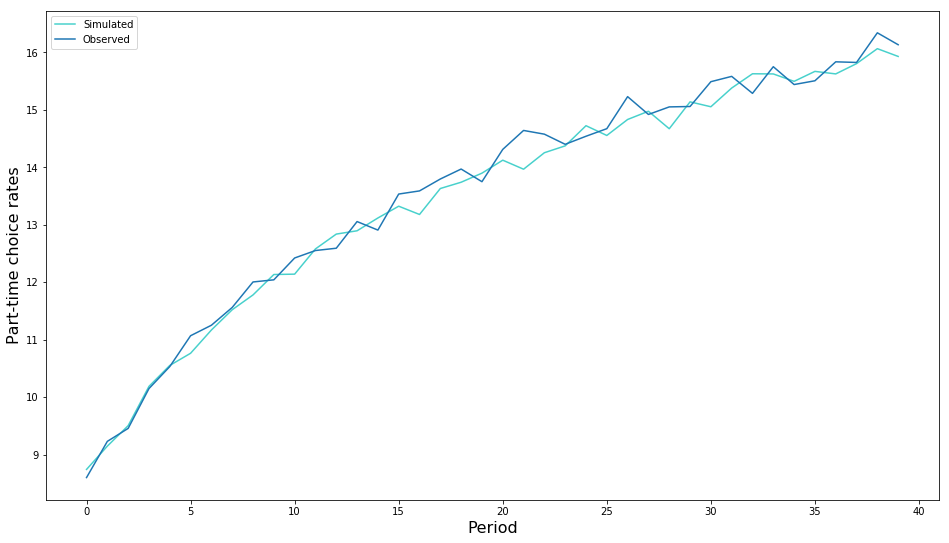

In [18]:
obs_wages = []
for _, value in obs_moments["Wage_Distribution"].items():
    temp = [_, value]
    obs_wages.append(temp[1][0])

sim_wages = []
for _, value in seed_sim_moments["Wage_Distribution"].items():
    temp = [_, value]
    sim_wages.append(temp[1][0])

x = np.arange(40)

# Start plot
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel("Part-time choice rates", fontsize=16)
ax.set_xlabel("Period", fontsize=16)

plt.plot(x, sim_wages, color = 'mediumturquoise')
plt.plot(x, obs_wages)

ax.legend(["Simulated", "Observed"])

#plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Comparison delta zero with true starting vector
--------------------------------------------------------

In [21]:
data_sim_delta0_1 = soepy.simulate("init_files/Archive/toy_model_init_file_03_3types.pkl", "init_files/Archive/model_spec_init_test_delta0.yml")
delta0_1_sim_moments = get_moments(data_sim_delta0_1)

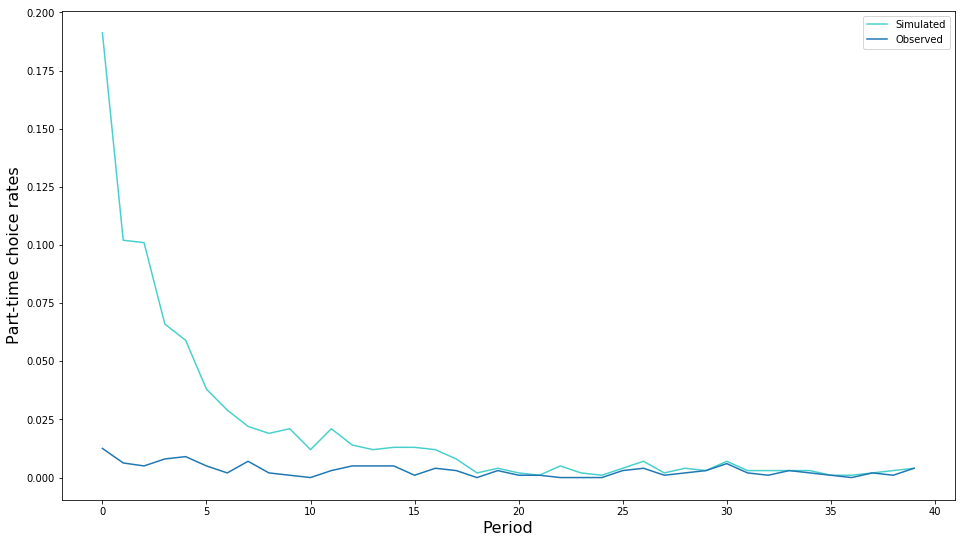

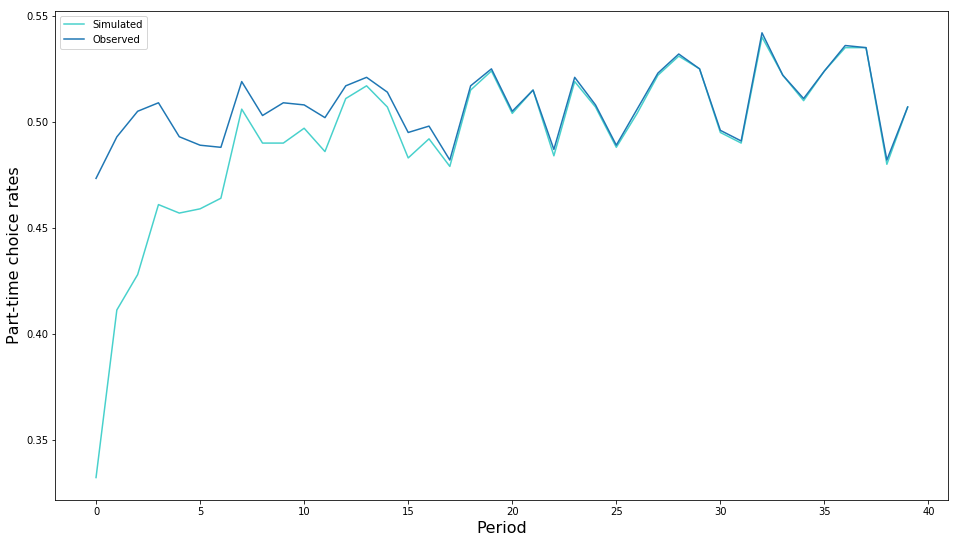

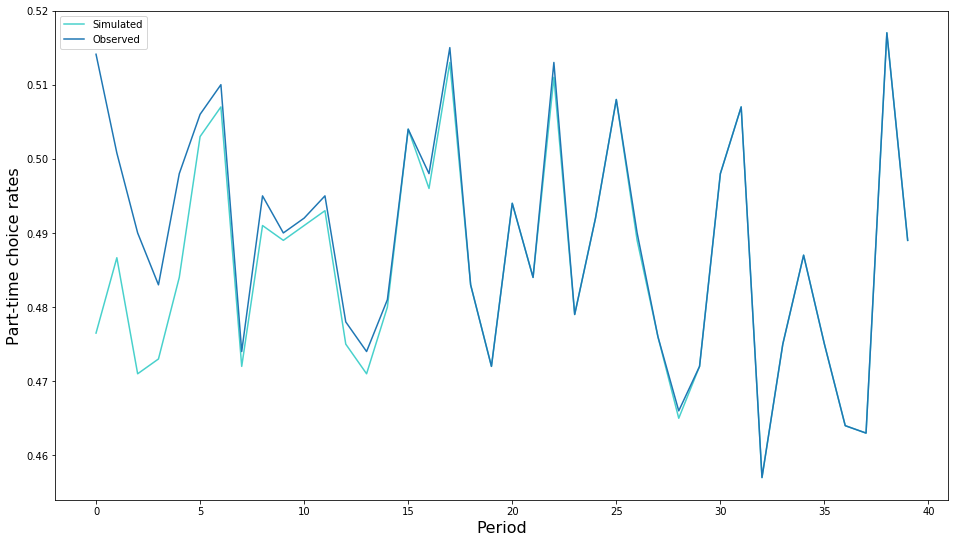

In [22]:
for choice in range(3):

    obs_choice_prob = []
    for _, value in obs_moments["Choice_Probability"].items():
        temp = [_, value]
        obs_choice_prob.append(temp[1][choice])

    sim_choice_prob = []
    for _, value in delta0_1_sim_moments["Choice_Probability"].items():
        temp = [_, value]
        sim_choice_prob.append(temp[1][choice])
        
    x = np.arange(40)

    # Start plot
    ax = plt.figure(figsize=[16,9]).add_subplot(111)
    ax.set_ylabel("Part-time choice rates", fontsize=16)
    ax.set_xlabel("Period", fontsize=16)

    plt.plot(x, sim_choice_prob, color = 'mediumturquoise')
    plt.plot(x, obs_choice_prob)

    ax.legend(["Simulated", "Observed"])

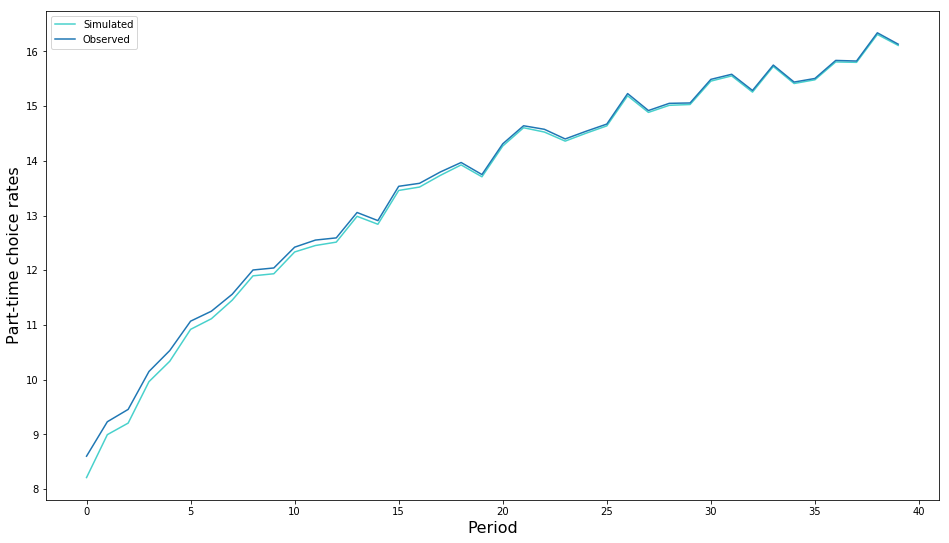

In [23]:
obs_wages = []
for _, value in obs_moments["Wage_Distribution"].items():
    temp = [_, value]
    obs_wages.append(temp[1][0])

sim_wages = []
for _, value in delta0_1_sim_moments["Wage_Distribution"].items():
    temp = [_, value]
    sim_wages.append(temp[1][0])

x = np.arange(40)

# Start plot
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel("Part-time choice rates", fontsize=16)
ax.set_xlabel("Period", fontsize=16)

plt.plot(x, sim_wages, color = 'mediumturquoise')
plt.plot(x, obs_wages)

ax.legend(["Simulated", "Observed"])

#plt.savefig('choice_prob_cf.png', bbox_inches='tight')